In [1]:
%matplotlib inline
import matplotlib_inline
import warnings

# matplotlib_inline.backend_inline.set_matplotlib_formats('svg','pdf')
warnings.filterwarnings('ignore')

import csv
import numpy as np
import scipy as sp
from CoolProp import CoolProp as cpr
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import interp1d, interp2d
from scipy.special import *

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ["Computer Modern Roman"]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.markersize'] = 5

# Simulación directa - DNS

In [2]:
dt = 2.5e-3
dx = 1e-2

t0 = 0
tf = 300
xf = 1

t = np.arange(t0, tf + dt, dt)
x = np.arange(0, xf + dx, dx)

Nx = len(x) - 1
Nt = len(t) - 1

In [3]:
CFL = dt/dx
print('CFL = ', CFL)

CFL =  0.25


In [4]:
# Initialization
Tf = np.zeros((Nx+1, Nt+1))
Ts = np.zeros((Nx+1, Nt+1))

Tin = 0

# BCs
Tf[0,:] = Tin

# ICs
Tf[:,0] = 0
Ts[:,0] = 0

In [5]:
'''Lambda =  [[104.4139 104.4139 104.4139 104.4139 104.4139]
 [ 70.9587  70.9587  70.9587  70.9587  70.9587]
 [ 40.8325  40.8325  40.8325  40.8325  40.8325]
 [ 34.5747  34.5747  34.5747  34.5747  34.5747]
 [ 13.5209  13.5209  13.5209  13.5209  13.5209]
 [ 11.4488  11.4488  11.4488  11.4488  11.4488]
 [ 10.3872  10.3872  10.3872  10.3872  10.3872]
 [  9.6942   9.6942   9.6942   9.6942   9.6942]]
Lambdas =  [[0.0441 0.0566 0.0712 0.0881 0.3965]
 [0.0299 0.0385 0.0484 0.0599 0.2694]
 [0.0172 0.0221 0.0278 0.0345 0.155 ]
 [0.0146 0.0188 0.0236 0.0292 0.1313]
 [0.0057 0.0073 0.0092 0.0114 0.0513]
 [0.0048 0.0062 0.0078 0.0097 0.0435]
 [0.0044 0.0056 0.0071 0.0088 0.0394]
 [0.0041 0.0053 0.0066 0.0082 0.0368]]
beta =  [[1.8857e+00 2.2628e+00 2.6399e+00 3.0171e+00 5.6570e+00]
 [3.7710e-01 4.5260e-01 5.2800e-01 6.0340e-01 1.1314e+00]
 [3.7700e-02 4.5300e-02 5.2800e-02 6.0300e-02 1.1310e-01]
 [1.8900e-02 2.2600e-02 2.6400e-02 3.0200e-02 5.6600e-02]
 [4.0000e-04 5.0000e-04 5.0000e-04 6.0000e-04 1.1000e-03]
 [2.0000e-04 2.0000e-04 3.0000e-04 3.0000e-04 6.0000e-04]
 [1.0000e-04 2.0000e-04 2.0000e-04 2.0000e-04 4.0000e-04]
 [1.0000e-04 1.0000e-04 1.0000e-04 2.0000e-04 3.0000e-04]]
betas =  [[1.684178e+02 2.021013e+02 2.357849e+02 2.694684e+02 5.052533e+02]
 [3.368360e+01 4.042030e+01 4.715700e+01 5.389370e+01 1.010507e+02]
 [3.368400e+00 4.042000e+00 4.715700e+00 5.389400e+00 1.010510e+01]
 [1.684200e+00 2.021000e+00 2.357800e+00 2.694700e+00 5.052500e+00]
 [3.370000e-02 4.040000e-02 4.720000e-02 5.390000e-02 1.011000e-01]
 [1.680000e-02 2.020000e-02 2.360000e-02 2.690000e-02 5.050000e-02]
 [1.120000e-02 1.350000e-02 1.570000e-02 1.800000e-02 3.370000e-02]
 [8.400000e-03 1.010000e-02 1.180000e-02 1.350000e-02 2.530000e-02]]
eps =  [0.25 0.3  0.35 0.4  0.75]
gamma =  [[0.0003 0.0004 0.0004 0.0005 0.0009]
 [0.0003 0.0004 0.0004 0.0005 0.0009]
 [0.0003 0.0004 0.0004 0.0005 0.0009]
 [0.0003 0.0004 0.0004 0.0005 0.0009]
 [0.0003 0.0004 0.0004 0.0005 0.0009]
 [0.0003 0.0004 0.0004 0.0005 0.0009]
 [0.0003 0.0004 0.0004 0.0005 0.0009]
 [0.0003 0.0004 0.0004 0.0005 0.0009]]'''

Lambda = 10
Lambdas = 0.005
beta =  1e-4
betas =  1e-2
eps = 0.3

gamma =  (1 - eps)*Lambdas/Lambda
# gamma = Lambdas/Lambda

print('Lambda = ', np.round(Lambda, 4))
print('Lambdas = ', np.round(Lambdas, 4))
print('beta = ', np.round(beta, 4))
print('betas = ', np.round(betas, 4))
print('gamma = ', np.round(gamma, 4))

Lambda =  10
Lambdas =  0.005
beta =  0.0001
betas =  0.01
gamma =  0.0003


In [6]:
# Matrix terms
p = dt/dx

q = beta*dt/(dx**2)
qs = betas*dt/(dx**2)

r = Lambda*dt
rs = Lambdas*dt

In [7]:
# Explicit form of heat transfer term
diagonals = [np.ones(Nx)*(1 + 2*q + r + p), np.ones(Nx)*(-q), np.ones(Nx)*(-p-q)]

offsets = [0, 1, -1]
A = sp.sparse.diags(diagonals, offsets).toarray()
A[-1,-2] = -2*q - p
A[-1,-1] = 1 + 2*q + r + p + 2*q/p

A = sp.sparse.csr_matrix(A)

In [8]:
# Explicit form of heat transfer term
diagonals = [np.ones(Nx + 1)*(1 + 2*qs + rs), np.ones(Nx + 1)*(-qs), np.ones(Nx + 1)*(-qs)]

offsets = [0, 1, -1]
As = sp.sparse.diags(diagonals, offsets).toarray()
As[-1,-2] = -2*qs
As[0,1] = -2*qs

As = sp.sparse.csr_matrix(As)

In [9]:
bc0 = np.zeros(Nx)
bc1 = np.zeros(Nx)

bc0[0] = Tin
bc1[-1] = 1

In [10]:
AA = sp.sparse.block_diag((sp.sparse.linalg.inv(A), sp.sparse.linalg.inv(As)))

Heat source

In [11]:
Delta = 0.5
x0 = 0.5
delta = 0.005

Q = np.tanh(t/Delta)*np.exp(-(1/delta)*(x[:,np.newaxis] - x0)**2)/np.sqrt(np.pi*delta)

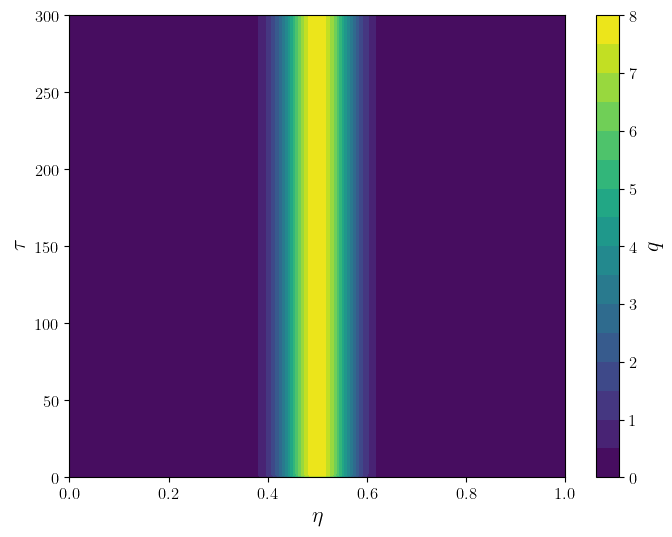

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

cs1 = plt.contourf(x, t, Q.T, 16)
cbar1 = plt.colorbar(cs1)
cbar1.set_label(r'$q$', fontsize=16)
ax.set_xlabel(r'$\eta$', fontsize=16)
ax.set_ylabel(r'$\tau$', fontsize=16)

fig.savefig('./figs/q_vs_tau_vs_eta' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')

plt.show()

Numerical solution

In [13]:
for i in range(1,Nt+1):
    
    bc1[-1] = 2*q/p*Tf[-1,i-1]
    TT = np.concatenate([Tf[1:Nx+1,i-1] + (q + p)*bc0 + r*Ts[1:,i-1] + bc1 + eps*dt*Q[1:,i-1],
                         Ts[:,i-1] + rs*Tf[:Nx+1,i-1] + dt*gamma*Q[:,i-1]])

#     TT = np.concatenate([Tf[1:Nx+1,i-1] + (q + p)*bc0 + r*Ts[1:,i-1] + bc1,
#                          Ts[:,i-1] + rs*Tf[:Nx+1,i-1] + dt*gamma*Q[:,i-1]])  
    
    sol = AA.dot(TT)
    
    Tf[1:Nx+1,i] = sol[:Nx]
    Ts[:,i] = sol[Nx:]
    

In [14]:
thetaf = Tf
thetas = Ts

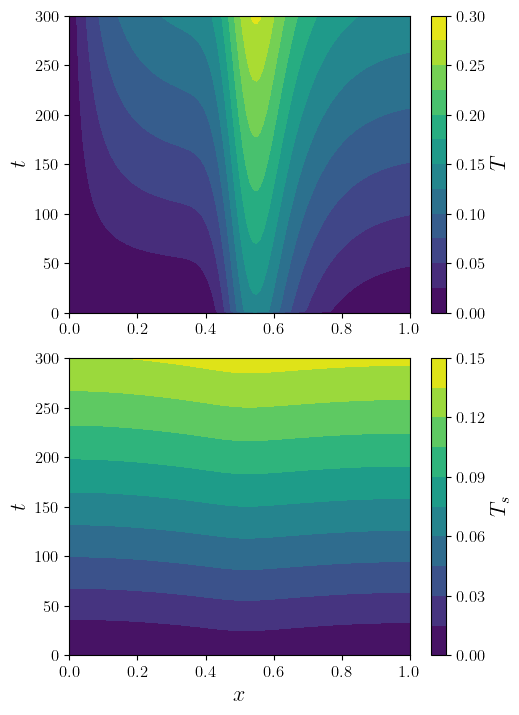

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,7), sharex='row')
(ax1, ax2) = axs

cs1 = ax1.contourf(x, t, thetaf.T, 12)
plt.tight_layout()
cbar1 = plt.colorbar(cs1)
cbar1.set_label(r'$T$', fontsize=16)
ax1.set_ylabel(r'$t$', fontsize=16)
# ax1.plot(x, x,'r--', label=r'$x = t$')

cs2 = ax2.contourf(x, t, thetas.T, 12)
cbar2 = plt.colorbar(cs2)
cbar2.set_label(r'$T_s$', fontsize=16)
ax2.set_xlabel(r'$x$', fontsize=16)
ax2.set_ylabel(r'$t$', fontsize=16)
# ax2.plot(x, x,'r--')
ax2.set_xlim([0, 1])

fig.savefig('./figs/DNS_T_vs_x_vs_t_Lambda_' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')
plt.show()

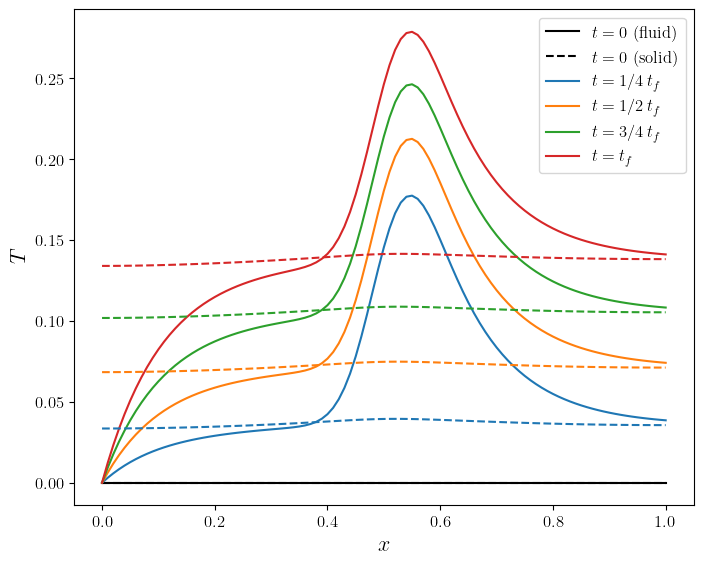

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

plt.plot(x, thetaf[:,0], 'k', x, thetas[:,0], 'k--',
         x, thetaf[:,int(1/4*len(t))], 
         x, thetaf[:,int(2/4*len(t))],
         x, thetaf[:,int(3/4*len(t))],
         x, thetaf[:,-1])

plt.gca().set_prop_cycle(None)

plt.plot(x, thetas[:,int(1/4*len(t))], '--', 
         x, thetas[:,int(2/4*len(t))], '--',
         x, thetas[:,int(3/4*len(t))], '--',
         x, thetas[:,-1], '--')

plt.legend([r'$t = 0$ (fluid)', r'$t = 0$ (solid)', r'$t = 1/4 \,t_f$',
            r'$t = 1/2 \,t_f$', r'$t = 3/4 \,t_f$', r'$t = t_f$'])

ax.set_box_aspect(0.8)
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$T$', fontsize=16)
# ax.set_ylim([-1,0])

fig.savefig('./figs/DNS_Tf_Ts_vs_x_Lambda_' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')
plt.show()

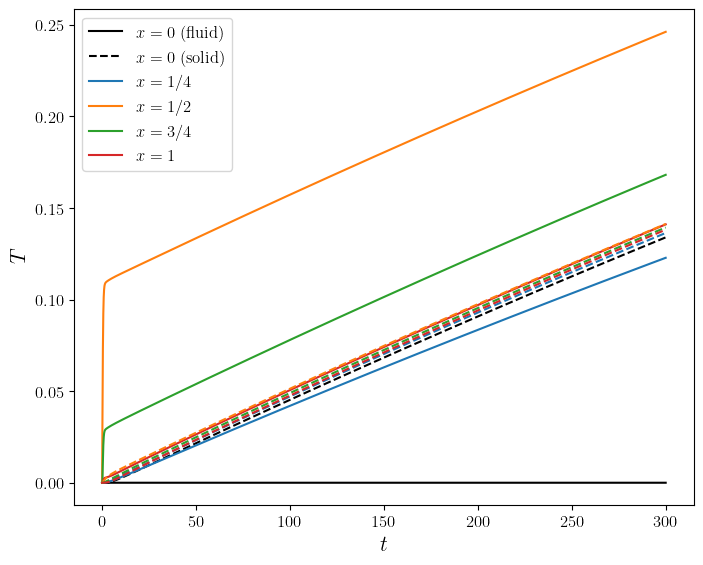

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(t, thetaf[0,:], 'k-', t, thetas[0,:], 'k--',
         t, thetaf[int(1*len(x)/4),:],
         t, thetaf[int(2*len(x)/4),:], 
         t, thetaf[int(3*len(x)/4),:],
         t, thetaf[-1,:])

plt.gca().set_prop_cycle(None)

plt.plot(t, thetas[int(1*len(x)/4),:], '--',
         t, thetas[int(2*len(x)/4),:], '--',
         t, thetas[int(3*len(x)/4),:], '--',
         t, thetas[-1,:], '--')

plt.legend([r'$x = 0$ (fluid)', r'$x = 0$ (solid)', r'$x = 1/4$',
            r'$x = 1/2$', r'$x = 3/4$', r'$x = 1$'])
ax.set_box_aspect(0.8)
ax.set_xlabel(r'$t$', fontsize=16)
ax.set_ylabel(r'$T$', fontsize=16)

fig.savefig('./figs/DNS_Tf_Ts_vs_t_Lambda_' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')
plt.show()

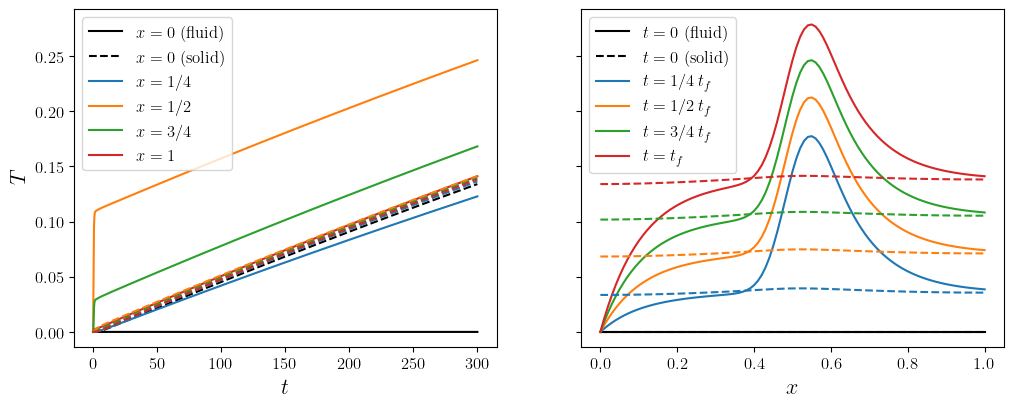

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,12), sharey='all')
(ax1, ax2) = axs

ax1.plot(t, thetaf[0,:]*0, 'k-',
         t, thetas[0,:], 'k--',
         t, thetaf[int(1/4*len(x)),:],
         t, thetaf[int(1/2*len(x)),:],
         t, thetaf[int(3/4*len(x)),:],
         t, thetaf[-1,:])

ax1.set_prop_cycle(None)

ax1.plot(t, thetas[int(1/4*len(x)),:], '--',
         t, thetas[int(1/2*len(x)),:], '--',
         t, thetas[int(3/4*len(x)),:], '--',
         t, thetas[-1,:], '--')

ax1.legend([r'$x = 0$ (fluid)', r'$x = 0$ (solid)',
            r'$x = 1/4$', r'$x = 1/2$', r'$x = 3/4$', r'$x = 1$'])
ax1.set_box_aspect(0.8)
ax1.set_xlabel(r'$t$', fontsize=16)
ax1.set_ylabel(r'$T$', fontsize=16)

##

ax2.plot(x, thetaf[:,0], 'k',
         x, thetas[:,0], 'k--',
         x, thetaf[:,int(1/4*len(t))], 
         x, thetaf[:,int(2/4*len(t))],
         x, thetaf[:,int(3/4*len(t))],
         x, thetaf[:,-1])

plt.gca().set_prop_cycle(None)

ax2.plot(x, thetas[:,int(1/4*len(t))], '--', 
         x, thetas[:,int(2/4*len(t))], '--',
         x, thetas[:,int(3/4*len(t))], '--',
         x, thetas[:,-1], '--')

ax2.legend([r'$t = 0$ (fluid)', r'$t = 0$ (solid)',
            r'$t = 1/4 \,t_f$', r'$t = 1/2 \,t_f$', r'$t = 3/4 \,t_f$', r'$t = t_f$'])
ax2.set_box_aspect(0.8)
ax2.set_xlabel(r'$x$', fontsize=16)

fig.savefig('./figs/DNS_T_vs_x_vs_t_subplot_Lambda_' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')
plt.show()

# Simulación por las características

In [19]:
# Malla características
CFL = dt/dx

dtc = dt
dxc = dtc

xc = np.arange(0, 1 + dxc, dxc)
tc = np.arange(0, tf + dtc, dtc)

In [20]:
# Discretización
xvc, tvc = np.meshgrid(xc, tc, indexing='ij')

Cp = xvc*0
Cn = xvc*0

Tsc = xvc*0
Tfc = xvc*0

# BCs
Tfc[0,:] = Tin

# ICs
Tfc[:,0] = 0
Tsc[:,0] = 0

# Valor inicial de las características
Cp[:,0] = tc[0] + xc
Cn[:,0] = xc

Matrix assembly

In [21]:
A = [[1 + 0.5*Lambda*dtc, -0.5*Lambda*dtc],
    [-0.5*Lambdas*dtc, 1 + 0.5*Lambdas*dtc]]
Ainv = np.linalg.inv(A)

In [22]:
Qc = np.tanh(tc/Delta)*np.exp(-(1/delta)*(xc[:,np.newaxis] - x0)**2)/np.sqrt(np.pi*delta)

In [ ]:
# Numerical integration by using explicit Euler
for j in range(1,len(tc)): 
    Cp[:,j] = tc[j] + xc
    Cn[:,j] = xc

    for i in range(1,len(xc)):
        
        Tfc[i,j], Tsc[i-1,j] = Ainv.dot([-0.5*Lambda*(Tfc[i-1,j-1] - Tsc[i-1,j-1])*dtc + Tfc[i-1,j-1] + eps*dtc*Qc[i-1,j-1],
                                        0.5*Lambdas*(Tfc[i-1,j-1] - Tsc[i-1,j-1])*dtc + Tsc[i-1,j-1] + gamma*dtc*Qc[i-1,j-1]])
   

    # Tfc[i,j], Tsc[i-1,j] = Ainv.dot([-0.5*Lambda*(Tfc[i-1,j-1] - Tsc[i-1,j-1])*dtc + Tfc[i-1,j-1],
    #                                         0.5*Lambdas*(Tfc[i-1,j-1] - Tsc[i-1,j-1])*dtc + Tsc[i-1,j-1] + dtc*gamma*Qc[i-1,j-1]])    

In [ ]:
fig, axs = plt.subplots()

axs.plot(Cp[::int(len(xc)/4 - 1),:].T, tc, 'b-')
axs.plot(Cn[::int(len(xc)/4 - 1),:].T, tc, 'r--')

axs.set_ylabel(r'$t$', fontsize=16)
axs.set_xlabel(r'$C^+/C^-$', fontsize=16)

fig.savefig('./figs/characteristics_Lambda_' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,7), sharex='row')
(ax1, ax2) = axs

cs1 = ax1.contourf(xvc, tvc, Tfc, 12)
plt.tight_layout()
cbar1 = plt.colorbar(cs1)
cbar1.set_label(r'$T$', fontsize=16)
ax1.set_ylabel(r'$t$', fontsize=16)
# ax1.plot(xc, xc,'r--', label=r'$x = t$')


cs2 = ax2.contourf(xvc, tvc, Tsc, 12)
plt.tight_layout()
cbar2 = plt.colorbar(cs2)
cbar2.set_label(r'$T_s$', fontsize=16)
ax2.set_ylabel(r'$t$', fontsize=16)
# ax2.set_box_aspect(1)
# ax2.plot(xc, xc,'r--', label=r'$x = t$')
ax2.set_xlim([0, 1])
#ax2.set_ylim([0, 1])
ax2.set_xlabel(r'$x$', fontsize=16)

fig.savefig('./figs/char_T_vs_x_vs_t_Lambda_' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6,8))

plt.plot(xc, Tfc[:,0], 'k-', xc, Tsc[:,0], 'k--',
         xc, Tfc[:,int(0.25/dtc)], xc, Tfc[:,int(0.5/dtc)],
         xc, Tfc[:,int(1/4*len(tc))], xc, Tfc[:,int(2/4*len(tc))],
         xc, Tfc[:,int(3/4*len(tc))], xc, Tfc[:,-1])

plt.gca().set_prop_cycle(None)

plt.plot(xc[:-1], Tsc[:-1,int(0.25/dtc)], '--', xc[:-1], Tsc[:-1,int(0.5/dtc)], '--',
         xc[:-1], Tsc[:-1,int(1/4*len(tc))], '--', xc[:-1], Tsc[:-1,int(2/4*len(tc))], '--',
         xc[:-1], Tsc[:-1,int(3/4*len(tc))], '--', xc[:-1], Tsc[:-1,-1], '--')

plt.legend([r'$t = 0$ (char.-fluid)', r'$t = 0$ (char.-solid)',
            r'$t = 1/4$',r'$t = 1/2$',r'$t = 1/4 \,t_f$',
            r'$t = 1/2 \,t_f$', r'$t = 3/4 \,t_f$', r'$t = t_f$'], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_box_aspect(0.8)
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$T$', fontsize=16)
fig.savefig('./figs/char_Tf_Ts_vs_x_Lambda_' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')
plt.show()

# Profiles comparison: DNS vs. characteristics

In [ ]:
fig, ax = plt.subplots(figsize=(6,8))

plt.plot(x, thetaf[:,0], 'k',
         xc, Tfc[:,0], 'k--',
         x, thetaf[:,int(0.25/dt)],
         x, thetaf[:,int(0.50/dt)],
         x, thetaf[:,int(1/4*len(t))],
         x, thetaf[:,int(2/4*len(t))],
         x, thetaf[:,int(3/4*len(t))],
         x, thetaf[:,-1])

plt.gca().set_prop_cycle(None)

plt.plot(xc[:-1], Tfc[:-1,int(0.25/dtc)], '--',
         xc[:-1], Tfc[:-1,int(0.50/dtc)], '--',
         xc[:-1], Tfc[:-1,int(1/4*len(tc))], '--',
         xc[:-1], Tfc[:-1,int(2/4*len(tc))], '--',
         xc[:-1], Tfc[:-1,int(3/4*len(tc))], '--',
         xc[:-1], Tfc[:-1,-1], '--')

plt.title(r'Fluid temperature')

plt.legend([r'$t = 0$ (DNS)', r'$t = 0$ (char.)',
            r'$t = 1/4$', r'$t = 1/2$',
            r'$t = 1/4 \,t_f$', r'$t = 1/2 \,t_f$',
            r'$t = 3/4 \,t_f$', r'$t = t_f$'], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_box_aspect(0.8)
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$T_f$', fontsize=16)
fig.savefig('./figs/DNS_vs_characteristics_fluid_Lambda_' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

# DNS - fluid
plt.plot(x, thetaf[:,0], 'b-')
plt.plot(xc, Tfc[:,0], 'b--')
plt.plot(x, thetas[:,0], 'r-')
plt.plot(xc[:-1], Tsc[:-1,0], 'r--')

plt.plot(x, thetaf[:,int(0.25/dt)], 'b-', label='DNS-fluid')
plt.plot(x, thetaf[:,int(0.50/dt)], 'b-')
plt.plot(x, thetaf[:,int(1/4*len(t))], 'b-')
plt.plot(x, thetaf[:,int(2/4*len(t))], 'b-')
plt.plot(x, thetaf[:,int(3/4*len(t))], 'b-')
plt.plot(x, thetaf[:,-1], 'b-')

# DNS - solid
plt.plot(x, thetas[:,int(0.25/dt)], 'r-')
plt.plot(x, thetas[:,int(0.50/dt)], 'r-')
plt.plot(x, thetas[:,int(1/4*len(t))], 'r-', label='DNS-solid')
plt.plot(x, thetas[:,int(2/4*len(t))], 'r-')
plt.plot(x, thetas[:,int(3/4*len(t))], 'r-')
plt.plot(x, thetas[:,-1], 'r-')

# Char. - fluid
plt.plot(xc[:-1], Tfc[:-1,int(0.25/dtc)], 'b--')
plt.plot(xc[:-1], Tfc[:-1,int(0.50/dtc)], 'b--')
plt.plot(xc[:-1], Tfc[:-1,int(1/4*len(tc))], 'b--', label='Char.-fluid')
plt.plot(xc[:-1], Tfc[:-1,int(2/4*len(tc))], 'b--')
plt.plot(xc[:-1], Tfc[:-1,int(3/4*len(tc))], 'b--')
plt.plot(xc[:-1], Tfc[:-1,-1], 'b--')

# Char. - solid
plt.plot(xc[:-1], Tsc[:-1,int(0.25/dtc)], 'r--')
plt.plot(xc[:-1], Tsc[:-1,int(0.50/dtc)], 'r--')
plt.plot(xc[:-1], Tsc[:-1,int(1/4*len(tc))], 'r--', label='Char.-solid')
plt.plot(xc[:-1], Tsc[:-1,int(2/4*len(tc))], 'r--')
plt.plot(xc[:-1], Tsc[:-1,int(3/4*len(tc))], 'r--')
plt.plot(xc[:-1], Tsc[:-1,-1], 'r--')

# Average T
# plt.plot(xc + 0.05, xc*0 + 0.5, 'k-.')

'''
# Cosmetics
plt.text(0.83, 0.53, r'$T_{in}/2$', fontsize=14)
plt.arrow(-0.05, 0.85, 1, -0.5, width=0.0001, color='k', head_width=0.0125, head_length=0.025, lw=0.5)
plt.text(0.80, 0.25, r'$t = 1/4,\, 1/2,\,1/4\,t_f,$', fontsize=12) 
plt.text(0.865, 0.20, r'$1/2\,t_f,3/4\,t_f,\,t_f.$', fontsize=12)
'''

plt.xlim([-0.125, xc[-1] + 0.125])

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_box_aspect(0.8)
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$T$', fontsize=16)

fig.savefig('./figs/DNS_vs_characteristics_all_Lambda_' + str(np.round(Lambda, 2))
            + '_Lambdas_' + str(np.round(Lambdas, 2)) + '.pdf', bbox_inches='tight')
plt.show()


## Valores típicos de los parámetros - Sandia Lab (Hoffman et al., 2016)

In [ ]:
eps = 0.22
L = 3
R = 1.5
mdot = 5.46
dp = 19.1e-3
T = 0.5*(359.9 + 289) + 273 #Kelvin

# Molten salts properties
rhof = 2090 - 0.636*T
Cf = 1443 + 0.172*T
kf = 0.443 + 0.000019*T
muf = (22.174 - 0.12*T + 2.281e-4*T**2 - 1.474e-7*T**3)/1e3

# Quartzite properties
rhos = 2500
Cs = 830
ks = 5.69

# Fluid flow
u = mdot/(rhof*np.pi*eps*R**2)

Re = rhof*u*dp/muf
Pr = muf*Cf/kf

# Vol heat transfer coeff
hv = 6*(1 - eps)*kf*(2 + 1.1*Re**0.6*Pr**(1/3))/(dp**2)

# Coefficients
Lambda = hv*L/(rhof*Cf*u*eps)
Lambdas = hv*L/(rhos*Cs*u*(1-eps))

beta = kf/(L*u)
betas = ks/(L*u)

gamma = eps*rhof*Cf/(rhos*Cs)

q0 = 1

print('Lambda = ', np.round(Lambda, 4))
print('Lambdas = ', np.round(Lambdas, 4))
print('beta = ', np.round(beta, 4))
print('betas = ', np.round(betas, 4))
print('gamma = ', np.round(gamma, 4))
print('q0 = ', np.round(q0, 4))
print('Re = ', np.round(Re, 4))
print('Pr = ', np.round(Pr, 4))
print('dp/L = ', np.round(dp/L, 4))
print('R/L = ', np.round(R/L, 4))
print('eps = ', np.round(eps, 4))
print('hv = ', np.round(hv, 4), 'W/(m^3 K)')

## Valores típicos de los parámetros - Solar One (Hoffman et al., 2016)

In [ ]:
eps = 0.22
L = 12
R = 18.2/2
mdot = 23
dp = 4.6e-3
T = 0.5*(295.5 + 192.2) + 273 #Kelvin

# Molten salts properties
rhof = 871.1 - 0.713*T
Cf = 1836.8 + 3.456*T
kf = 0.125 + 0.000014*T
muf = 72.159*T**(-2.096)

# Granite rock and sand properties
rhos = 2643
Cs = 1020
ks = 2.2

# Fluid flow
u = mdot/(rhof*np.pi*eps*R**2)

Re = rhof*u*dp/muf
Pr = muf*Cf/kf

# Vol heat transfer coeff
hv = 6*(1 - eps)*kf*(2 + 1.1*Re**0.6*Pr**(1/3))/(dp**2)

# Coefficients
Lambda = hv*L/(rhof*Cf*u*eps)
Lambdas = hv*L/(rhos*Cs*u*(1-eps))

beta = kf/(L*u)
betas = ks/(L*u)

gamma = eps*rhof*Cf/(rhos*Cs)

q0 = 1

print('Lambda = ', np.round(Lambda, 4))
print('Lambdas = ', np.round(Lambdas, 4))
print('beta = ', np.round(beta, 4))
print('betas = ', np.round(betas, 4))
print('gamma = ', np.round(gamma, 4))
print('q0 = ', np.round(q0, 4))
print('Re = ', np.round(Re, 4))
print('Pr = ', np.round(Pr, 4))
print('dp/L = ', np.round(dp/L, 4))
print('R/L = ', np.round(R/L, 4))
print('eps = ', np.round(eps, 4))
print('hv = ', np.round(hv, 4), 'W/(m^3 K)')

## Valores típicos de los parámetros - Promes CNRS (Hoffman et al., 2016)

In [ ]:
eps = 0.41
L = 1.8
R = 0.2
mdot = 1.9e-2
dp = 40e-3
T = 0.5*(210 + 160) + 273 #Kelvin

# Rapeseed oil properties
rhof = 928.19 - 0.6691*T
Cf = (1.621e-9*T**4 - 8.735e-7*T**3 + 14.933e-5*T**2 - 5.976e-3*T + 2.0985)*1000
kf = 2e-7*T**2 + 1.714e-4*T + 0.1698
muf = (39.498*T**(-1.764))/1000

# Quartzite properties
rhos = 2500
Cs = 830
ks = 5.69

# Fluid flow
u = mdot/(rhof*np.pi*eps*R**2)

Re = rhof*u*dp/muf
Pr = muf*Cf/kf

# Vol heat transfer coeff
hv = 6*(1 - eps)*kf*(2 + 1.1*Re**0.6*Pr**(1/3))/(dp**2)

# Coefficients
Lambda = hv*L/(rhof*Cf*u*eps)
Lambdas = hv*L/(rhos*Cs*u*(1-eps))

beta = kf/(L*u)
betas = ks/(L*u)

gamma = (1-eps)*Lambdas/Lambda

q0 = 1

print('Lambda = ', np.round(Lambda, 4))
print('Lambdas = ', np.round(Lambdas, 4))
print('beta = ', np.round(beta, 4))
print('betas = ', np.round(betas, 4))
print('gamma = ', np.round(gamma, 4))
print('q0 = ', np.round(q0, 4))
print('Re = ', np.round(Re, 4))
print('Pr = ', np.round(Pr, 4))
print('dp/L = ', np.round(dp/L, 4))
print('R/L = ', np.round(R/L, 4))
print('eps = ', np.round(eps, 4))
print('hv = ', np.round(hv, 4), 'W/(m^3 K)')

## Valores típicos de los parámetros (Hänchen et al., 2011)

In [ ]:
eps = 0.36
L = 25
R = 7
mdot = 119
dp = 0.1
T = 0.5*(550 + 150) + 273 #Kelvin

# Heated air properties
rhof = cpr.PropsSI('D', 'T', T, 'P', 5e5, 'Air')
Cf = cpr.PropsSI('C', 'T', T, 'P', 5e5, 'Air')
kf = cpr.PropsSI('L', 'T', T, 'P', 5e5, 'Air')
muf = cpr.PropsSI('V', 'T', T, 'P', 5e5, 'Air')

# Filler properties
rhos = 2800
Cs = 1030
ks = 2.5

# Fluid flow
u = mdot/(rhof*np.pi*eps*R**2)

Re = rhof*u*dp/muf
Pr = muf*Cf/kf

# Vol heat transfer coeff
hv = 6*(1 - eps)*kf*(2 + 1.1*Re**0.6*Pr**(1/3))/(dp**2)

# Coefficients
Lambda = hv*L/(rhof*Cf*u*eps)
Lambdas = hv*L/(rhos*Cs*u*(1-eps))

beta = kf/(L*u)
betas = ks/(L*u)

gamma = (1 - eps)*Lambdas/Lambda

q0 = 1

print('Lambda = ', np.round(Lambda, 4))
print('Lambdas = ', np.round(Lambdas, 4))
print('beta = ', np.round(beta, 4))
print('betas = ', np.round(betas, 4))
print('gamma = ', np.round(gamma, 4))
print('q0 = ', np.round(q0, 4))
print('Re = ', np.round(Re, 4))
print('Pr = ', np.round(Pr, 4))
print('dp/L = ', np.round(dp/L, 4))
print('R/L = ', np.round(R/L, 4))
print('eps = ', np.round(eps, 4))
print('hv = ', np.round(hv, 4), 'W/(m^3 K)')

## Valores típicos de los parámetros (Stack et al., 2017)

In [ ]:
eps = np.array([0.25, 0.30, 0.35, 0.4, 0.75])
L = 10
R = 1
mdot = np.array([0.01, 0.05, 0.5, 1, 50, 100, 150, 200]) #189.5
dp = 0.15
T = 0.5*(100 + 1200) + 273 #Kelvin

p0 = 1e6

# Heated air properties
rhof = cpr.PropsSI('D', 'T', T, 'P', p0, 'Air')
Cf = cpr.PropsSI('C', 'T', T, 'P', p0, 'Air')
kf = cpr.PropsSI('L', 'T', T, 'P', p0, 'Air')
muf = cpr.PropsSI('V', 'T', T, 'P', p0, 'Air')

# Filler properties
rhos = 3987
Cs = 840
ks = 5.7

# Fluid flow
u = mdot[:,np.newaxis]/(rhof*np.pi*eps*R**2)
Re = rhof*u*2*R/muf

Rep = rhof*u*dp/muf
Pr = muf*Cf/kf

# Vol heat transfer coeff
hv = 6*(1 - eps)*kf*(2 + 1.1*Rep**0.6*Pr**(1/3))/(dp**2)
hv = 700*(mdot[:,np.newaxis]/(dp*np.pi*R**2))**0.76

# Coefficients
Lambda = hv*L/(rhof*Cf*u*eps)
Lambdas = hv*L/(rhos*Cs*u*(1-eps))

beta = kf/(L*u)
betas = ks/(L*u)

gamma = (1 - eps)*Lambdas/Lambda
# gamma = Lambdas/Lambda

power = mdot*Cf*(1700 - 25)

print('Lambda = ', np.round(Lambda, 4))
print('Lambdas = ', np.round(Lambdas, 4))
print('beta = ', np.round(beta, 4))
print('betas = ', np.round(betas, 4))
print('eps = ', np.round(eps, 4))

print('gamma = ', np.round(gamma, 4))
print('power = ', np.round(power/1e6, 4), 'MW')

print('Rep = ', np.round(Rep, 4))
print('Re = ', np.round(Re, 4))
print('Pr = ', np.round(Pr, 4))
print('dp/L = ', np.round(dp/L, 4))
print('R/L = ', np.round(R/L, 4))
print('hv = ', np.round(hv, 4), 'W/(m^3 K)')